In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
import pandas as pd 
import seaborn as sns
from PIL import Image  
import itertools
from tensorflow.keras import  callbacks
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import os

In [2]:
data_dir = r"C:\Users\psath\OneDrive\Desktop\pd\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "\\train"
valid_dir = data_dir + "\\valid"
diseases = os.listdir(train_dir)

In [3]:
diseases

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [4]:
print("Number of classes : " ,len(diseases))

Number of classes :  38


In [5]:
nums_train = {}
nums_val = {}
for disease in diseases:
    nums_train[disease] = len(os.listdir(train_dir + '/' + disease))
    nums_val[disease] = len(os.listdir(valid_dir + '/' + disease))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


,no. of images
Apple___Apple_scab,2016
Apple___Black_rot,1987
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Blueberry___healthy,1816
Cherry_(including_sour)___healthy,1826
Cherry_(including_sour)___Powdery_mildew,1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642
Corn_(maize)___Common_rust_,1907
Corn_(maize)___healthy,1859


<AxesSubplot:title={'center':'Train data distribution '}, xlabel='Number of images', ylabel='Plant'>

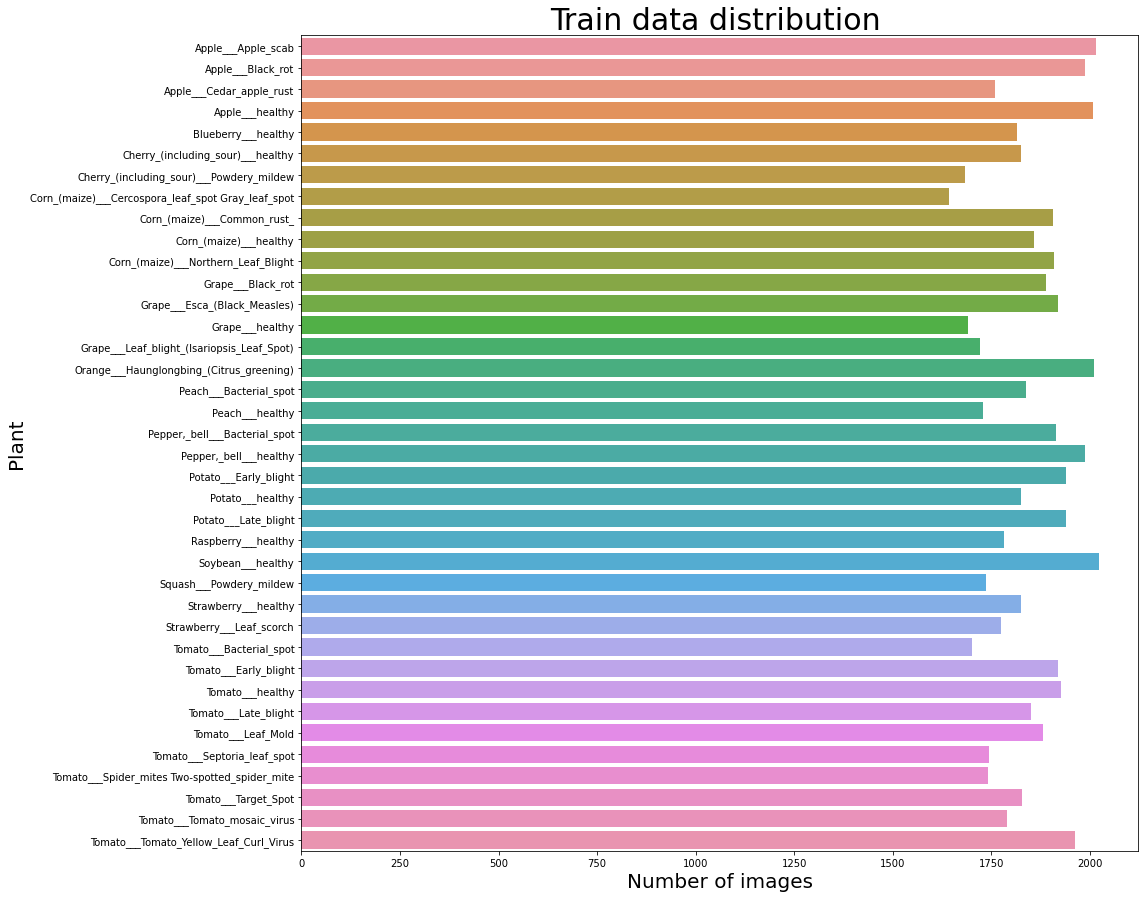

In [6]:
plt.figure(figsize=(15,15))
plt.title('Train data distribution ',fontsize=30)
plt.xlabel('Number of images',fontsize=20)
plt.ylabel('Plant',fontsize=20)

keys = list(nums_train.keys())
# get values in the same order as keys, and parse percentage values
vals = list(nums_train.values())
sns.barplot(y=keys, x=vals)

In [7]:
number_train = 0
for value in nums_train.values():
    number_train += value
print("The number of images for training : ",number_train)

The number of images for training :  70295


In [8]:
plants=[]
diseases_unique=[]
for i in diseases:
  if(i.split('__'))[0] not in plants:
    plants.append(i.split('__')[0])
  if(i.split('___'))[1] != 'healthy':
    diseases_unique.append(i.split('___')[1])

In [9]:
print('Plants :',plants)
# Number of platns:
print('-'*100)
print('Number of plants : ',len(plants))

Plants : ['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']
----------------------------------------------------------------------------------------------------
Number of plants :  14


In [10]:
print('diseases :',diseases_unique)
# Number of unique diseases:
print('-'*100)
print('Number of unique diseases : ',len(diseases_unique))

diseases : ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'Powdery_mildew', 'Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_', 'Northern_Leaf_Blight', 'Black_rot', 'Esca_(Black_Measles)', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Haunglongbing_(Citrus_greening)', 'Bacterial_spot', 'Bacterial_spot', 'Early_blight', 'Late_blight', 'Powdery_mildew', 'Leaf_scorch', 'Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_mosaic_virus', 'Tomato_Yellow_Leaf_Curl_Virus']
----------------------------------------------------------------------------------------------------
Number of unique diseases :  26


In [11]:
img_per_class_val = pd.DataFrame(nums_val.values(), index=nums_val.keys(), columns=["no. of images"])
print('Validation data distribution :')
img_per_class_val

Validation data distribution :


,no. of images
Apple___Apple_scab,504
Apple___Black_rot,497
Apple___Cedar_apple_rust,440
Apple___healthy,502
Blueberry___healthy,454
Cherry_(including_sour)___healthy,456
Cherry_(including_sour)___Powdery_mildew,421
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,410
Corn_(maize)___Common_rust_,477
Corn_(maize)___healthy,465


<AxesSubplot:title={'center':'Validation data distribution '}, xlabel='Number of images', ylabel='Plants'>

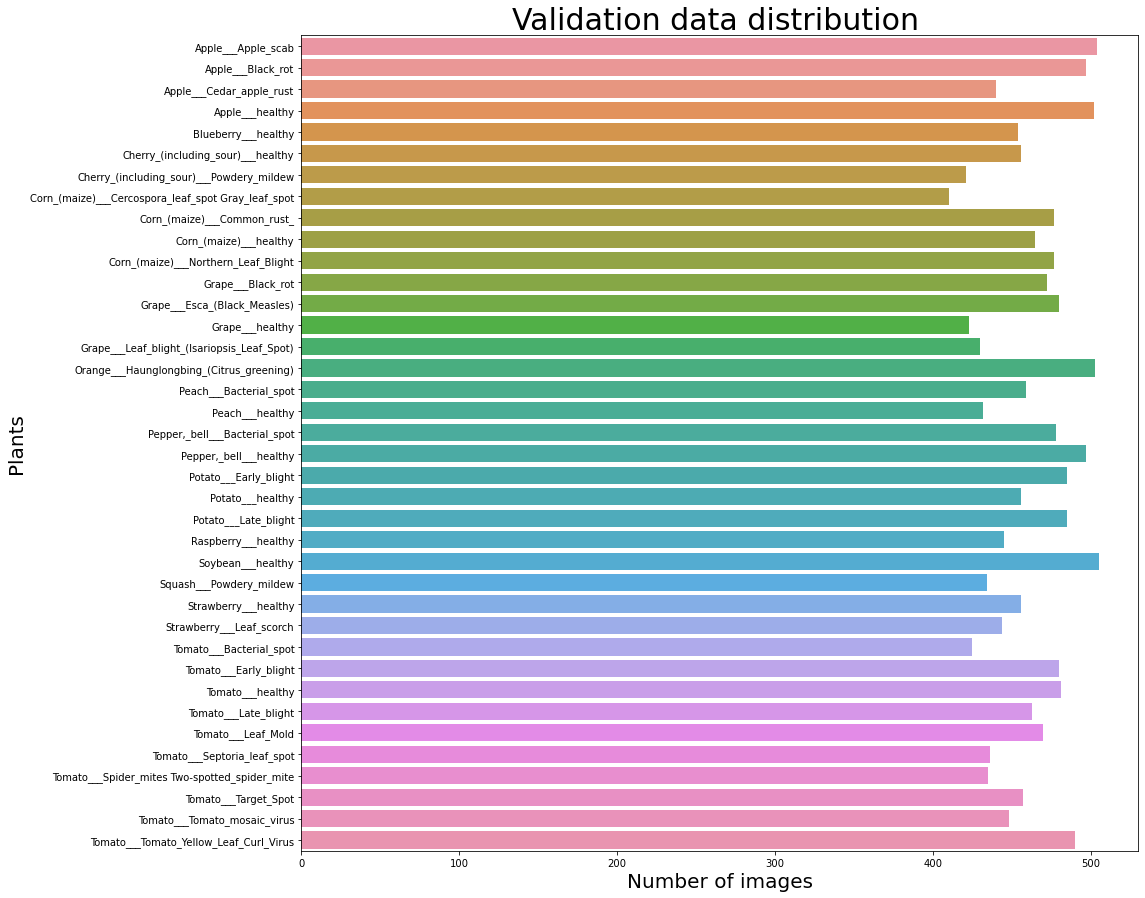

In [12]:
plt.figure(figsize=(15,15))
plt.title('Validation data distribution ',fontsize=30)
plt.xlabel('Number of images',fontsize=20)
plt.ylabel('Plants',fontsize=20)

keys = list(nums_val.keys())

vals = list(nums_val.values())
sns.barplot(y=keys, x=vals)

In [13]:
number_val = 0
for value in nums_val.values():
    number_val += value
print("The number of images for validation : ",number_val)

The number of images for validation :  17572


In [14]:
train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode="nearest",
                                   rotation_range = 20,
                                   width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)


valid_data = ImageDataGenerator( rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)


train_gen = train_data.flow_from_directory(directory= train_dir,
                                               target_size=(150, 150), 
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='training')


valid_gen = train_data.flow_from_directory(directory= train_dir,
                                               target_size=(150, 150),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='validation',
                                               shuffle=False)

label_map = (train_gen.class_indices)
print("Target Classes Mapping Dict:\n")
print(label_map)
label_map = (valid_gen.class_indices)
print("Target Classes Mapping Dict:\n")
print(label_map)


valid_gen = valid_data.flow_from_directory(directory= valid_dir,
                                               target_size=(150, 150),
                                               batch_size=64,
                                               class_mode='categorical') 
label_map = (valid_gen.class_indices)
print("Target Classes Mapping Dict:\n")
print(label_map)

Found 56251 images belonging to 38 classes.
Found 14044 images belonging to 38 classes.
Target Classes Mapping Dict:

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Stra

In [15]:
model_1 = keras.models.Sequential()

model_1.add(keras.layers.Conv2D(8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(150, 150, 3)))

model_1.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))

model_1.add(keras.layers.Conv2D(16,  kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_1.add(keras.layers.Conv2D(32,  kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_1.add(keras.layers.Conv2D(32,  kernel_size=(3,3), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(38, activation='softmax'))

print(model_1.summary())
optimizer = Adam(learning_rate=0.001)
model_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 16)        1168      
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                        

In [16]:
early_stopping_cb = callbacks.EarlyStopping(monitor="val_loss", patience=3)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                              factor=0.2, 
                                              patience=2,
                                              verbose=1, 
                                              min_lr=1e-7)
history = model_1.fit(train_gen,
                    epochs=10,
                    verbose=1,
                    callbacks=[early_stopping_cb, reduce_lr],
                    validation_data = valid_gen, 
                    batch_size=150
                    )

Epoch 1/10
1758/1758 [==============================] - 1107s 629ms/step - loss: 1.4554 - accuracy: 0.5707 - val_loss: 1.5241 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 2/10
1758/1758 [==============================] - 1232s 701ms/step - loss: 0.7352 - accuracy: 0.7704 - val_loss: 0.6762 - val_accuracy: 0.7913 - lr: 0.0010
Epoch 3/10
1758/1758 [==============================] - 1163s 662ms/step - loss: 0.5447 - accuracy: 0.8268 - val_loss: 0.9895 - val_accuracy: 0.7314 - lr: 0.0010
Epoch 4/10
1758/1758 [==============================] - ETA: 0s - loss: 0.4438 - accuracy: 0.8591
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1758/1758 [==============================] - 1102s 627ms/step - loss: 0.4438 - accuracy: 0.8591 - val_loss: 0.8052 - val_accuracy: 0.7713 - lr: 0.0010
Epoch 5/10
1758/1758 [==============================] - 1573s 895ms/step - loss: 0.2968 - accuracy: 0.9029 - val_loss: 0.2285 - val_accuracy: 0.9261 - lr: 2.0000e-04
Epoch 6/10
1758/1758 [

In [17]:
model_1.evaluate(valid_gen)

275/275 [==============================] - 151s 549ms/step - loss: 0.2106 - accuracy: 0.9318


[0.21055176854133606, 0.9318233728408813]

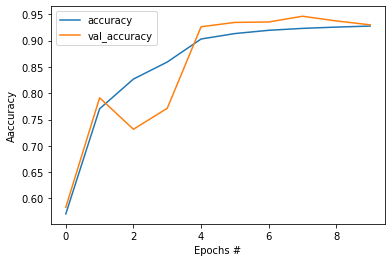

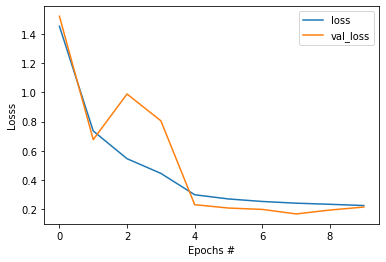

In [18]:
hist = history.history
def show_plt(type):
    if type == 1:
        plt.plot(hist["accuracy"], label="accuracy")
        plt.plot(hist["val_accuracy"], label="val_accuracy")
        plt.ylabel("Aaccuracy")
        plt.xlabel("Epochs #")
        plt.legend()
        plt.show()
    else:
        plt.plot(hist["loss"], label="loss")
        plt.plot(hist["val_loss"], label="val_loss")
        plt.ylabel("Losss")
        plt.xlabel("Epochs #")
        plt.legend()
        plt.show()
        
show_plt(1)
show_plt(0)